<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/EDA/comparison_distributions/01_workshop_comparison_distributions_test_kolmogorov_smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

# **Data**
---
El set de datos Snmesp del paquete de R plm contiene una muestra de los salarios (en escala logarítmica) pagados en España durante los años 1983 a 1990 (783 observaciones por año).

In [2]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/Snmesp.csv'
data = pd.read_csv(url)

In [3]:
data['year'] = data['year'].astype(str)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1476 non-null   object 
 1   salary  1476 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.2+ KB


- No hay valores nulos

# **Análisis grafico**
---

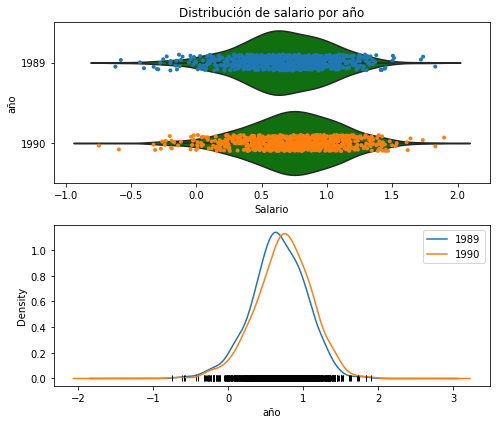

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (7,6))
sns.violinplot(x = data['salary'], y = data['year'], color = 'g', ax = ax[0])
sns.stripplot(
    x = data['salary'],
    y = data['year'],
    data = data,
    size = 4,
    jitter = 0.1,
    ax = ax[0])
ax[0].set_title('Distribución de salario por año')
ax[0].set_ylabel('año')
ax[0].set_xlabel('Salario')

for year in data.year.unique():
  data_temp = data[data.year == year]['salary']
  data_temp.plot.kde(ax = ax[1], label = year)
  ax[1].plot(data_temp, np.full_like(data_temp, 0), '|k', markeredgewidth=1)

ax[1].set_xlabel('año')
ax[1].legend()
fig.tight_layout();

- Se presenta una ligera desviación de la distribución del año 1990 con respecto al año 1989.
- Si bien se evidencia la diferencia atravez del año, ambas distribuciones mantiene una forma similar

# **Función de distribución acumulada empiríca**
---
La clase ECDF() de la librería statsmodels permite ajustar la función de distribución acumulada empírica a partir de una muestra. El resultado de esta función es un objeto ecdf que se comporta de forma similar a un modelo predictivo, recibe un vector de observaciones y devuelve su probabilidad acumulada estimada.


In [5]:
# Ajuste de la muestra
ecdf_1989 = ECDF(data.loc[data.year == '1989', 'salary'])
ecdf_1990 = ECDF(data.loc[data.year == '1990', 'salary'])

In [6]:
# Estimación de la probabilidad acumulada de cada valor
grid_salary = np.sort(data.salary.unique())
prob_acumulada_ecdf_1989 = ecdf_1989(grid_salary)
prob_acumulada_ecdf_1990 = ecdf_1990(grid_salary)

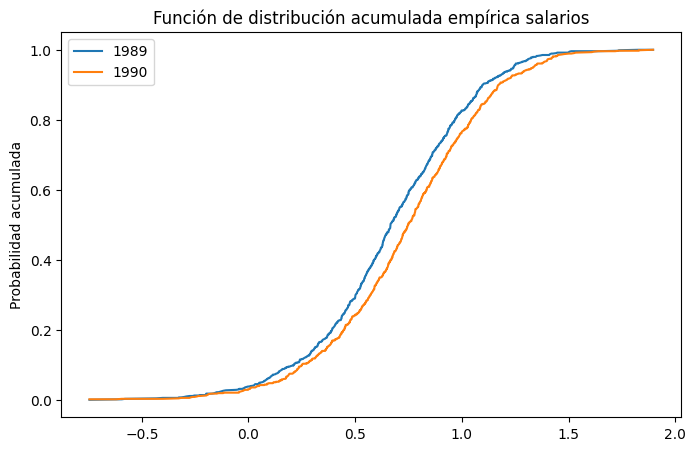

In [7]:
# Representación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
ax.plot(grid_salary, prob_acumulada_ecdf_1989, label = '1989')
ax.plot(grid_salary, prob_acumulada_ecdf_1990, label = '1990')
ax.set_title("Función de distribución acumulada empírica salarios")
ax.set_ylabel("Probabilidad acumulada")
ax.legend();

Text(0, 0.5, 'Probabilidad acumulada')

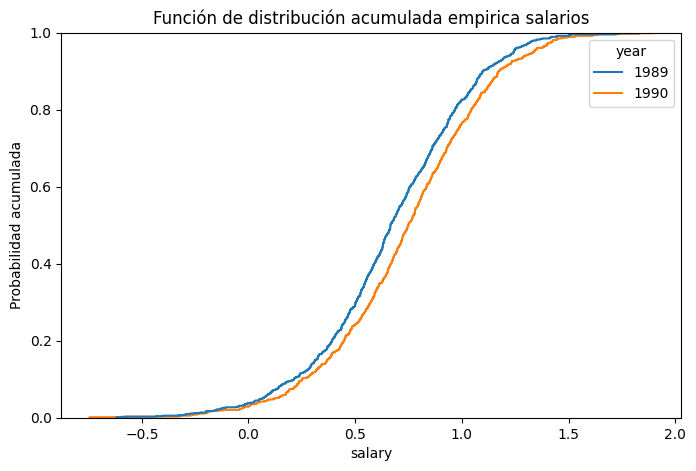

In [8]:
# Curvas ecdf con seaborn
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 5))
sns.ecdfplot(data = data, x = 'salary', hue='year', ax = ax)
ax.set_title('Función de distribución acumulada empirica salarios')
ax.set_ylabel('Probabilidad acumulada')

# Cálculo de la distancia Kolmogorov–Smirnov
---
1. Se calcula la diferencia absoluta entre las probabilidades acumuladas de cada una de las funciones ecdf (la diferencia absoluta entre cada punto de las curvas)
2. Se identifica el valor máximo.


In [9]:
abs_dif = np.abs(prob_acumulada_ecdf_1989 - prob_acumulada_ecdf_1990)
distancias_ks = np.max(abs_dif)
print(f'Distancia maxima Kolmogorov-Smirnov entre las dos distribuciones %.4f' % distancias_ks)

Distancia maxima Kolmogorov-Smirnov entre las dos distribuciones 0.1057


- La hipótesis nula de este test considera que ambas muestras proceden de la misma distribución, por lo tanto, solo cuando el p-value estimado es muy pequeño (significativo), se puede considerar que **hay evidencias en contra de que la distribución de ambas muestras es la misma.**

In [10]:
ks_2samp(
    data.loc[data.year == '1989', 'salary'],
    data.loc[data.year == '1990', 'salary']
)

KstestResult(statistic=0.10569105691056911, pvalue=0.0005205845230085144, statistic_location=0.6692902, statistic_sign=1)

Hay evidencias suficientes para considerar que la **distribución de salarios ha variado de un año a otro.**



# **Referencia**
---
https://www.cienciadedatos.net/documentos/pystats08-comparacion-distribuciones-test-kolmogorov-smirnov-python.html